In [14]:
# Лабораторна робота №3
# Тема: Регресійний аналіз
# Мета: Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучними наборами даних, застосовувати моделі для прогнозування та аналізувати результати

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Завдання 1: Kaggle Dataset

In [4]:
import pandas as pd
from data_load import load_data, prepare_xy
from regression_model import train_model, predict
from evaluation import evaluate
from plot_results import plot_regression

df = load_data(r'C:\Users\HP Victus\OneDrive\Рабочий стол\hulchak-DATA_SCIENCE\lab.3\plots\test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
X, y = prepare_xy(df, feature_col='GrLivArea', target_col='LotArea')
X.head(), y.head()

(   GrLivArea
 0        896
 1       1329
 2       1629
 3       1604
 4       1280,
 0    11622
 1    14267
 2    13830
 3     9978
 4     5005
 Name: LotArea, dtype: int64)

In [9]:
model = train_model(X, y)
y_pred = predict(model, X)
y_pred[:5]

array([ 7613.23057539,  9232.0332286 , 10353.60550565, 10260.14114923,
        9048.84309002])

In [10]:
mse, mae, r2 = evaluate(y, y_pred)
print(f"MSE: {mse}, MAE: {mae}, R²: {r2}")

MSE: 21247174.6032043, MAE: 2905.428273449186, R²: 0.13419327107639878


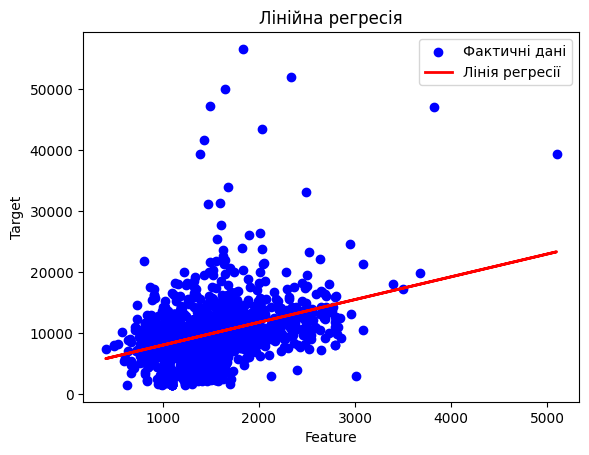

In [11]:
plot_regression(X, y, y_pred)

Завдання 2: Штучний Dataset

In [15]:
np.random.seed(42)
X_synthetic = np.random.randint(1, 100, 50)
y_synthetic = 3 * X_synthetic + np.random.normal(0, 10, 50)

df_synthetic = pd.DataFrame({'X': X_synthetic, 'y': y_synthetic})
df_synthetic.head()

,X,y
0,52,149.997461
1,93,288.474398
2,15,47.910340
3,72,209.644403
4,61,172.784478


Synthetic Dataset -> MSE: 106.34802555487346, MAE: 8.25080139103949, R²: 0.9839764910853346


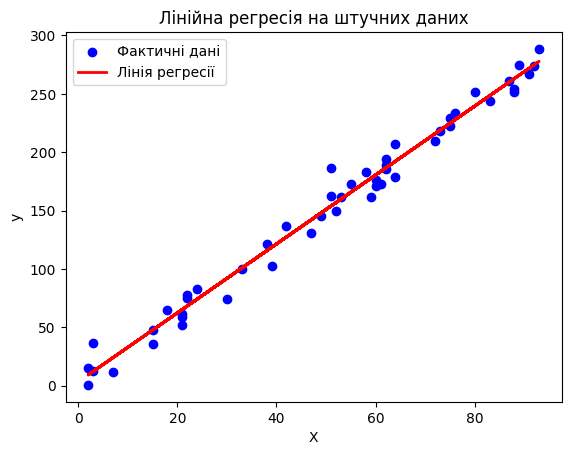

In [16]:
X = df_synthetic[['X']]
y = df_synthetic['y']

model_synthetic = LinearRegression()
model_synthetic.fit(X, y)
y_pred_synthetic = model_synthetic.predict(X)

mse = mean_squared_error(y, y_pred_synthetic)
mae = mean_absolute_error(y, y_pred_synthetic)
r2 = r2_score(y, y_pred_synthetic)

print(f"Synthetic Dataset -> MSE: {mse}, MAE: {mae}, R²: {r2}")

plt.scatter(X, y, color='blue', label='Фактичні дані')
plt.plot(X, y_pred_synthetic, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія на штучних даних')
plt.legend()
plt.show()

# Висновки

- **Kaggle Dataset**: Модель показала залежність між `GrLivArea` та `LotArea`. Це дозволяє прогнозувати площу ділянки на основі площі житлової частини будинку.  
- **Штучний Dataset**: Модель підтвердила лінійну залежність між `X` та `y`, що демонструє правильність роботи алгоритму лінійної регресії.  
- **Загальний висновок**: Регресійний аналіз дозволяє оцінити силу і напрямок зв’язку між змінними та робити прогнози, як на реальних даних, так і на штучно згенерованих.
